# K-Means Application: Image Segmentation by Color


In this notebook we will learn how to use K-Means algorithm for doing image segmentation. 

The goal of segmentation is to **partition an image into regions**. Each region should have a reasonably homogeneous visual appearance or correspond to objects or parts of objects.

Each image is represented as a 3D RGB array. The segmentation algorithm simply treats each pixel in the image as a separate data point. Then, it re-draws the image **replacing each pixel vector** with the {R, G, B} intensity triplet given by the cluster center to which that pixel has been assigned. 

Essentially this is **color segmentation** in which pixels are assigned to the same segment if they have a similar color. 


## Application of Color Segmentation

Analyzing satellite images to measure how much total forest area there is in a region.


It should be emphasized that this use of K-Means is not a particularly sophisticated approach to image segmentation. Because it takes no account of the spatial proximity of different pixels. 


Advanced image segmentation types include. 

- Semantic segmentation: all pixels that are part of the same object type get assigned to the same segment. 

        For example, in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would be one segment containing all the pedestrians). 

- Instance segmentation: all pixels that are part of the same individual object are assigned to the same segment. In this case there would be a different segment for each pedestrian. 

The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks. 


In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.image import imread
from pylab import *

from sklearn.cluster import KMeans

## Display an Image

We use Matplotlib’s imread() function to display the image.

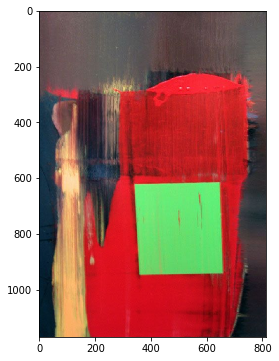

dtype('float32')

Image Shape (3D Array):  (1170, 812, 4)


In [2]:
plt.figure(figsize=(12, 6))
image = imread("datasets/pics/Hofmann.png") 
imshow(image)
show()

print("Image Shape (3D Array): ", image.shape)
image.dtype

## Shape of the Image

Observe that the image is represented as a 3D RGB array. 
- 1st Dimension: height.
- 2nd Dimension: width.
- 3rd Dimension: the number of color channels, in this case red, green, and blue (RGB). 

In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue, each between 0.0 and 1.0 (or between 0 and 255, if we use imageio.imread()). 

Note that some images may have fewer channels, such as grayscale images (one channel). And some images may have more channels, such as images with an additional alpha channel for transparency or satellite images, which often contain channels for many light frequencies (e.g., infrared). 

We need to understand the structure of the RGB array before we perform image segmentation by color using K-Means.


### RGB Image

An RGB image (also known as truecolor image) is stored as an m-by-n-by-3 data array (matrix) that defines red, green, and blue color components for each individual pixel. 

Each layer of the matrix is a 2D matrix of red, green or blue pixel values. 

<img src="https://cse.unl.edu/~hasan/RGB-1.png" width=300, height=100>

The color of each pixel is determined by the combination of the red, green, and blue intensities stored in each color plane at the pixel's location. Graphics file formats store RGB images as 24-bit images, where the red, green, and blue components are 8 bits each. This yields a potential of 16 million colors. The precision with which a real-life image can be replicated has led to the commonly used term truecolor image.

An RGB array can be of class double, uint8, or uint16. In an RGB array of class double, each color component is a value between 0 and 1. A pixel whose color components are (0,0,0) displays as black, and a pixel whose color components are (1,1,1) displays as white. 

The three color components for each pixel are stored along the third dimension of the data array. For example, the red, green, and blue color components of the pixel (10,5) are stored in RGB(10,5,1), RGB(10,5,2), and RGB(10,5,3), respectively.

To determine the color of the pixel at (2,3), we would look at the RGB triplet stored in (2,3,1:3). Suppose (2,3,1) contains the value 0.5176, (2,3,2) contains 0.1608, and (2,3,3) contains 0.0627. The color for the pixel at (2,3) is

        0.5176 0.1608 0.0627



## Image Segmentation by Color


**Main Idea**: Treat each pixel in the image as a separate data point. Then, re-draw the image **replacing each pixel vector** with the {R, G, B} intensity triplet given by the cluster center to which that pixel has been assigned. 

In other words, assign pixels to the same segment if they have a similar color. 

This is done in four steps.

- Step 1: Reshape the 3D array to get a long list of RGB colors (2D array). Each row represents a pixel using three columns.

        To obtain a feature vector characterizing the entire image arrange the individual RGB feature vectors into one long vector of dimension n x 3. Use the NumPy reshape(-1, 3) function to create a n x 3 array. 

- Step 2: Cluster these colors using K-Means. 

        For example, it may identify a color cluster for all shades of green.

- Step 3: For each pixel (color), find the mean color of the pixel’s color cluster (i.e., cluster center). 

        For example, all shades of green may be replaced with the same light green color (assuming the cluster center, i.e., the mean color of the green cluster is light green). 

- Step 4: Reshape this long list of colors to get the same shape as the original image. 


Dimension of Reshaped X:  (1266720, 3)

No. of Labels:  (1266720,)
No. of 3D Cluster Centers:  (8, 3)
3D Cluster Centers:
 [[1.000669   0.77817625 0.10204107]
 [0.19618621 0.21435583 0.99940693]
 [0.32272166 0.9815403  0.34210086]
 [0.84849393 0.11823684 0.14474633]
 [0.96791136 0.51362336 0.39146385]
 [0.3059379  0.26494014 0.2756804 ]
 [0.8730495  0.43618375 0.95369756]
 [0.18499091 1.0006795  0.78722054]]


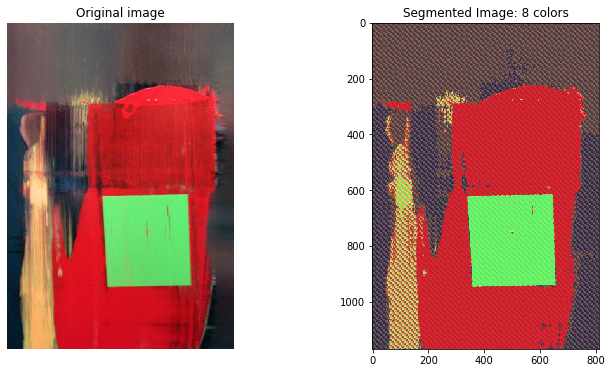

CPU times: user 59.7 s, sys: 3.98 s, total: 1min 3s
Wall time: 22.2 s


In [3]:
%%time

# Step 1: Reshape the 3D array to get a long list of RGB colors (2D array). 
#         Each row represents a pixel using three columns.
X = image.reshape(-1, 3)
print("Dimension of Reshaped X: ", X.shape)


# Step 2: Cluster these colors using K-Means
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)


# The label of an instance is the index of the cluster that instance gets assigned to
print("\nNo. of Labels: ", kmeans.labels_.shape)
print("No. of 3D Cluster Centers: ", kmeans.cluster_centers_.shape)
print("3D Cluster Centers:\n", kmeans.cluster_centers_)


# Step 3: For each pixel (color), find the mean color of the pixel’s color cluster (i.e., cluster center).
#         Input: labels of the instances (index of the cluster that an instance gets assigned to)
#         Output: The 3D cluster centers associated with each label
segmented_img = kmeans.cluster_centers_[kmeans.labels_]


# Step 4: Reshape this long list of colors to get the same shape as the original image. 
segmented_img = segmented_img.reshape(image.shape)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(122)
#plt.imshow(segmented_img/255)
plt.imshow((segmented_img * 255).astype(np.uint8))
plt.title("Segmented Image: {} colors".format(8))
show()

## Experiment with Varying Number of Clusters

We experiment with various numbers of clusters. 

Observe that when we use fewer than eight clusters, the bright green rectangular patch fails to get a cluster of its own: it gets merged with colors from the environment. This is because K-Means prefers clusters of similar sizes. The green rectangular patch is smaller than the rest of the image. So even though its color is bright, K-Means fails to dedicate a cluster to it.

In [4]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

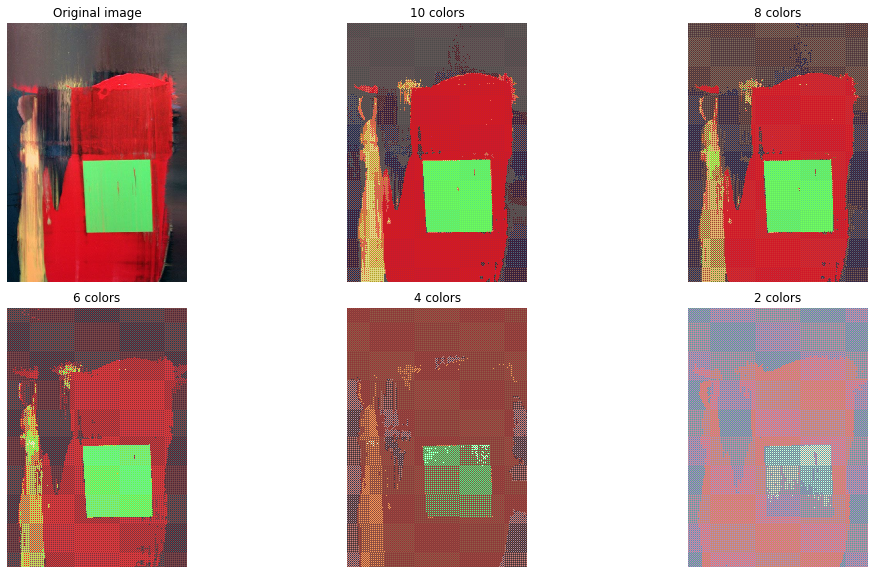

In [5]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    #plt.imshow(segmented_imgs[idx])
    plt.imshow((segmented_imgs[idx] * 255).astype(np.uint8))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')


plt.show()